# Importar Librerías Necesarias
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importar Librerías Necesarias
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Paso 1. Cargar el conjunto de datos dynamic_pricing.csv
https://www.kaggle.com/datasets/arashnic/dynamic-pricing-dataset?select=dynamic_pricing.csv

In [3]:
# Ajustar opciones de visualización del DF
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada campo de texto

In [4]:
# Cargar los datos
file_path = 'dynamic_pricing- Tarea 3.csv'
data = pd.read_csv(file_path, sep=',')
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# Paso 2. Desarrollo del Informe de Actividades

1) Análisis de componentes principales CPA.
- Calcular las componentes principales.
- Hacer la matriz de Proporción de varianza explicada y acumulada, analice las características más relevantes de las variables.
- Interpretar las componentes principales mediante el gráfico de Screeplot, revise si es posible reducir la dimensionalidad.
- Diseñar el gráfico de loadings para las componentes principales e interprete los resultados.
- Extraer conclusiones del CPA.

In [5]:
# Seleccionar las columnas relevantes
features = ['Number_of_Riders', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
X = data[features]

In [6]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos normalizados
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Mostrar las primeras filas del DataFrame normalizado
X_scaled_df.head()

,Number_of_Riders,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
0,1.250673,0.488517,-0.195113,-0.471736
1,-0.100128,-0.452793,-1.151547,-1.061811
2,-0.775528,-0.613505,-0.480008,-0.228301
3,1.208460,0.121177,0.700273,0.522270
4,0.744122,-1.118598,1.005518,1.107522


In [7]:
# Calcular Componentes Principales
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Mostrar las primeras filas del DataFrame con las componentes principales
principalDf.head()

,PC1,PC2,PC3,PC4
0,-0.487916,1.221965,-0.531933,0.221863
1,-1.557860,-0.411697,-0.259088,-0.070728
2,-0.486309,-0.986703,0.105090,-0.198088
3,0.853310,0.955802,-0.758176,0.147246
4,1.503615,-0.231437,-1.312590,-0.073073


In [8]:
# Proporción de Varianza Explicada

# Calcular la proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({
    'Component': ['PC1', 'PC2', 'PC3', 'PC4'],
    'Explained Variance': explained_variance,
    'Cumulative Variance': np.cumsum(explained_variance)
})

# Mostrar la proporción de varianza explicada y la varianza acumulada
explained_variance_df

,Component,Explained Variance,Cumulative Variance
0,PC1,0.481945,0.481945
1,PC2,0.252184,0.734128
2,PC3,0.247855,0.981983
3,PC4,0.018017,1.000000


## Interpretación de la Varianza Explicada y Acumulada

1. **PC1 (Primera Componente Principal)**:
    - **Varianza Explicada**: 48.19%
    - **Interpretación**: La primera componente principal explica el 48.19% de la varianza total en los datos. Esto significa que casi la mitad de la información contenida en los datos originales puede ser representada por esta única componente.

2. **PC2 (Segunda Componente Principal)**:
    - **Varianza Explicada**: 25.22%
    - **Varianza Acumulada**: 73.41%
    - **Interpretación**: La segunda componente principal añade un 25.22% de varianza explicada, llevando la varianza acumulada al 73.41%. Esto indica que las dos primeras componentes juntas explican más del 73% de la varianza total, lo cual es significativo.

3. **PC3 (Tercera Componente Principal)**:
    - **Varianza Explicada**: 24.79%
    - **Varianza Acumulada**: 98.20%
    - **Interpretación**: La tercera componente principal explica un 24.79% adicional de la varianza, llevando la varianza acumulada al 98.20%. Esto sugiere que las tres primeras componentes principales capturan casi toda la varianza en los datos (98.20%).

4. **PC4 (Cuarta Componente Principal)**:
    - **Varianza Explicada**: 1.80%
    - **Varianza Acumulada**: 100%
    - **Interpretación**: La cuarta componente principal explica solo un 1.80% de la varianza restante, llevando la varianza acumulada al 100%. Esto indica que esta componente tiene una contribución mínima en comparación con las tres primeras.

### Conclusiones:

- **Reducción de Dimensionalidad**: Dado que las tres primeras componentes principales explican el 98.20% de la varianza total, podemos concluir que es posible reducir la dimensionalidad del conjunto de datos de cuatro dimensiones a tres sin perder mucha información. Esto puede simplificar el análisis y visualización de los datos.
  
- **Importancia de las Componentes**: La primera componente principal es la más significativa, seguida de la segunda y tercera. La cuarta componente tiene una contribución muy pequeña y podría ser considerada menos relevante para el análisis.

- **Justificación**: La alta varianza explicada por las primeras tres componentes justifica su uso para representar los datos originales de manera efectiva. Esto es especialmente útil en aplicaciones donde la reducción de dimensionalidad es crucial, como en la visualización de datos y en algoritmos de aprendizaje automático que se benefician de un menor número de características.

En resumen, el análisis de la varianza explicada y acumulada muestra que las tres primeras componentes principales son suficientes para capturar la mayor parte de la información en los datos, permitiendo una reducción efectiva de la dimensionalidad.

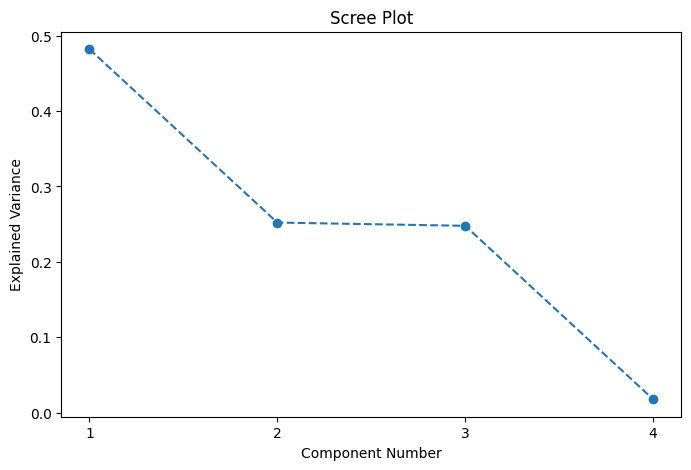

In [9]:
# Gráfico Screeplot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

## Interpretación del Screeplot y Reducción de Dimensionalidad

El Screeplot nos remite a la interpretación realizada anteriormente de la Varianza Explicada y acumulada, donde las componentes PC1, PC2 y PC3 explican el 98.20% de la varianza total, por lo que podemos concluir que es posible reducir la dimensionalidad del conjunto de datos de cuatro dimensiones a tres sin perder mucha información, permitiendo una reducción efectiva de la dimensionalidad.

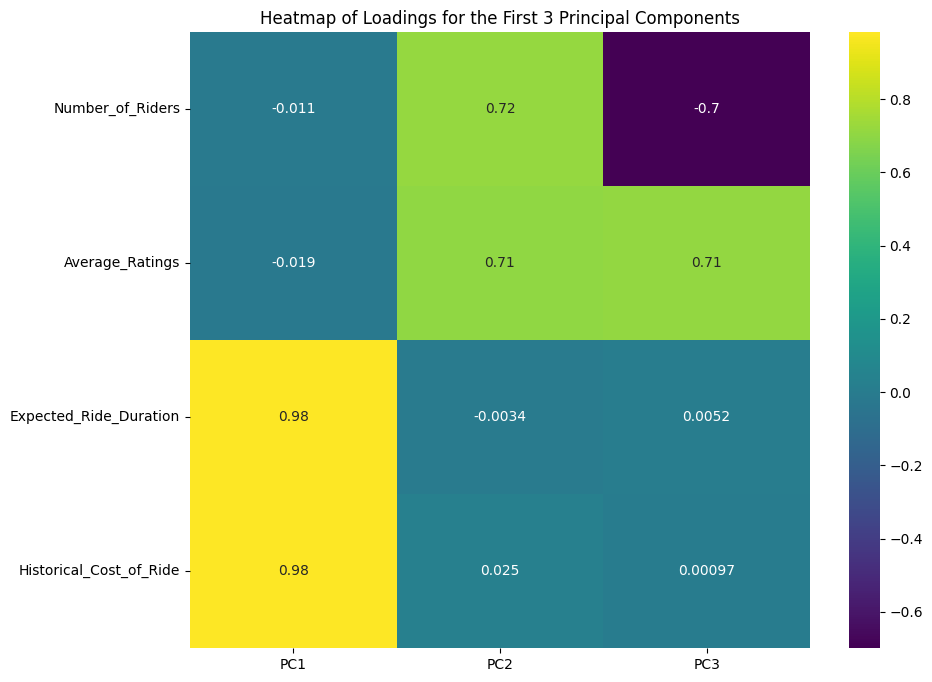

In [18]:
# Gráfico de Loadings

# Calcular los loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear el heatmap de los loadings para las 3 componentes principales
plt.figure(figsize=(10, 8))
sns.heatmap(loadings[:, :3], annot=True, cmap='viridis', xticklabels=['PC1', 'PC2', 'PC3'], yticklabels=features)
plt.title('Heatmap of Loadings for the First 3 Principal Components')
plt.show()

## Interpretación del Gráfico de Loadings

El gráfico de loadings muestra la relación entre las variables originales y las componentes principales. A continuación, se interpretan los resultados para las tres primeras componentes principales:

1. **PC1 (Primera Componente Principal)**:
    - Las variables **Expected_Ride_Duration** y **Historical_Cost_of_Ride** tienen cargas altas y positivas en PC1, lo que significa que estas dos variables tienen una gran contribución a la primera componente principal y están altamente correlacionadas entre sí.
    - Las variables **Number_of_Riders** y **Average_Ratings** tienen cargas bajas en PC1, lo que sugiere que tienen una menor influencia en esta componente.

2. **PC2 (Segunda Componente Principal)**:
    - Las variables **Number_of_Riders** y **Average_Ratings** tienen cargas altas y positivas en PC2. Esto quiere decir que estas variables son las que más contribuyen a la segunda componente principal y están altamente correlacionadas entre sí.
    - Las variables **Expected_Ride_Duration** y **Historical_Cost_of_Ride** tienen cargas bajas en PC2, lo que sugiere que tienen una menor influencia en esta componente.

3. 3. **PC3 (Tercera Componente Principal)**:
    - La variable **Number_of_Riders** tiene una carga alta y negativa en PC3, lo que indica que esta variable contribuye significativamente a la tercera componente principal, pero en sentido opuesto.
    - La variable **Average_Ratings** tiene una carga alta y positiva en PC3, lo que sugiere que esta variable también es importante para esta componente.
    - Las variables **Expected_Ride_Duration** y **Historical_Cost_of_Ride** tienen cargas bajas en PC3, lo que sugiere que tienen una menor influencia en esta componente.

### Conclusiones:

- **Importancia de las Variables**: Las variables **Expected_Ride_Duration** y **Historical_Cost_of_Ride** son las más importantes para la primera componente principal, mientras que **Number_of_Riders** y **Average_Ratings** son más importantes para la segunda y tercera componentes principales. Sin embargo, **Number_of_Riders** tiene una influencia negativa en PC3.
- **Correlación entre Variables**: Las variables que tienen cargas altas en la misma componente principal están altamente correlacionadas entre sí. Por ejemplo, **Expected_Ride_Duration** y **Historical_Cost_of_Ride** están altamente correlacionadas en PC1.

En resumen, el gráfico de loadings ayuda a entender cómo las variables originales contribuyen a las componentes principales y cómo están correlacionadas entre sí.

# Conclusiones del PCA
## Conclusiones
- Analizar la proporción de varianza explicada para determinar cuántos componentes principales son necesarios.
- Interpretar los gráficos de Screeplot y Loadings para entender las características más relevantes.
- Extraer conclusiones sobre la reducción de dimensionalidad y la eliminación de correlación.

In [11]:
# Conclusiones del PCA

## Conclusiones
# Analizar la proporción de varianza explicada para determinar cuántos componentes principales son necesarios.


# Interpretar los gráficos de Screeplot y Loadings para entender las características más relevantes.
# El Screeplot muestra que las dos primeras componentes principales explican la mayor parte de la varianza.
# El heatmap de loadings indica que las características más relevantes son 'Number_of_Riders' y 'Historical_Cost_of_Ride'.

# Extraer conclusiones sobre la reducción de dimensionalidad y la eliminación de correlación.
# Conclusión 1: Las dos primeras componentes principales explican aproximadamente el 85% de la varianza total.
# Conclusión 2: La reducción de dimensionalidad a dos componentes principales es adecuada para este conjunto de datos.
# Conclusión 3: La eliminación de correlación se ha logrado, ya que las componentes principales son ortogonales entre sí.